
# Empty ARF Fiber Wavelength Study

What does the wavelength sensitivity look like for the ARF fiber without microstructures?  Here we do this study for the fiber with a polymer coating with varying levels of material loss.

In [88]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from fiberamp.fiber.microstruct.pbg import ARF2
import matplotlib.pyplot as plt


In [149]:
B = ARF2(name='fine_cladding', poly_core=True, refine=0,
         curve=8, shift_capillaries=False)

d = (B.T_cladding )* B.scale

n1, n2 = 1.00027717, 1.4388164768221814
lines = [2 * n1 * d / m * ((n2/n1)**2 - 1)**.5 for m in range(11, 21)]

# for l in lines:
#     plt.plot([l,l],[-1,1])

ModeSolver: Checking if mesh has required regions
Mesh has  25312  elements,  12682  points,  and  37993  edges.


In [150]:
t0 = B.R_cladding * B.scale
t1 = B.T_cladding * B.scale
n_air = 1.00027717
n_glass = 1.4388164768221814

k = 0
# n_soft = 1.35 - k * 1j
n_poly = 1.45 - k * 1j

ts = [t0, t1, 60*t0, 5*t0]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly,lambda x:n_air]
mats = ['air', 'glass','poly', 'air']
maxhs = [2, .02, 1, 2]

# Initialize

In [98]:
n = 300
wls = np.linspace(1.4e-6, 1.405e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [99]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(len(wls)) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl, no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.99992 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33291926522917-1.2392126122931735e-05j) . Residual of determinant:  1.4915735240815746e-12 


     --------------------  2/301: wavelength: 1.4000166666666666e-06  --------------------     

Scaled beta:  (67.33205417890846-7.686402739332817e-06j) . Residual of determinant:  4.200459311938109e-12 


     --------------------  3/301: wavelength: 1.4000333333333333e-06  --------------------     

Scaled beta:  (67.3312114589463-5.290637577456955e-06j) . Residual of determinant:  6.957626346230548e-12 


     --------------------  4/301: wavelength: 1.4000499999999998e-06  --------------------     

Scaled beta:  (67.33038053676165-3.9515003138702204e-06j) . Residual of determinant:  9.268136295562771e-12 


     --------------------  5/301: wavelength: 1.4000666666666665e-06  --------------------     

Scaled beta:  (67.32955640525924-3.1499989858018034e-06j) . Residual of determinant:  1.

scaling guess: 1
Scaled beta:  (67.30044357504059-1.0315584636266675e-05j) . Residual of determinant:  1.580757240504217e-12 


     --------------------  42/301: wavelength: 1.4006833333333333e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.29955964885542-1.8151013368613043e-05j) . Residual of determinant:  2.460307625727904e-12 


     --------------------  43/301: wavelength: 1.4007e-06  --------------------     

Scaled beta:  (67.29991337920113-0.00010667812887134348j) . Residual of determinant:  2.4292676439568172e-14 


     --------------------  44/301: wavelength: 1.4007166666666667e-06  --------------------     

Scaled beta:  (67.29824419662256-0.00010736335120720146j) . Residual of determinant:  5.692457633898487e-13 


     --------------------  45/301: wavelength: 1.4007333333333334e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.29657492016817-0.00010628103170377901j) . Residual of determinant:  7.933014641600661e-14

Scaled beta:  (67.26857871668773-2.3320107871360413e-06j) . Residual of determinant:  1.9484251867553432e-12 


     --------------------  82/301: wavelength: 1.40135e-06  --------------------     

Scaled beta:  (67.2677630648283-2.6413501679172198e-06j) . Residual of determinant:  1.6118111026149916e-11 


     --------------------  83/301: wavelength: 1.4013666666666666e-06  --------------------     

Scaled beta:  (67.26694502102224-3.1326196175378564e-06j) . Residual of determinant:  4.821184392176638e-12 


     --------------------  84/301: wavelength: 1.4013833333333333e-06  --------------------     

Scaled beta:  (67.26612316675143-3.919364717769551e-06j) . Residual of determinant:  2.1590547019935197e-11 


     --------------------  85/301: wavelength: 1.4014e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.26529509973727-5.231556492349079e-06j) . Residual of determinant:  1.1654435491272488e-11 


     --------------------  86/301: wavelength: 1.401416666

Scaled beta:  (67.23666318732025-2.396783707741622e-06j) . Residual of determinant:  2.692372052443277e-11 


     --------------------  122/301: wavelength: 1.4020166666666666e-06  --------------------     

Scaled beta:  (67.23584934964977-2.1844898945114215e-06j) . Residual of determinant:  1.5485444497937034e-12 


     --------------------  123/301: wavelength: 1.4020333333333333e-06  --------------------     

Scaled beta:  (67.23503658036847-2.069383769455418e-06j) . Residual of determinant:  3.8289454487014477e-13 


     --------------------  124/301: wavelength: 1.40205e-06  --------------------     

Scaled beta:  (67.23422432580593-2.0337403587248897e-06j) . Residual of determinant:  2.7339504298503843e-12 


     --------------------  125/301: wavelength: 1.4020666666666667e-06  --------------------     

Scaled beta:  (67.23341210701989-2.0723471890658793e-06j) . Residual of determinant:  2.5795590265541958e-11 


     --------------------  126/301: wavelength: 1.40208333

Scaled beta:  (67.2048846442558-1.2081584776806648e-05j) . Residual of determinant:  1.848764176547148e-12 


     --------------------  162/301: wavelength: 1.4026833333333334e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.20402428877937-7.558508737532467e-06j) . Residual of determinant:  7.467109999597559e-12 


     --------------------  163/301: wavelength: 1.4027e-06  --------------------     

Scaled beta:  (67.20318539419357-5.2356265670070116e-06j) . Residual of determinant:  8.918708502039335e-12 


     --------------------  164/301: wavelength: 1.4027166666666666e-06  --------------------     

Scaled beta:  (67.20235791196053-3.928641328531248e-06j) . Residual of determinant:  1.2673827687549722e-12 


     --------------------  165/301: wavelength: 1.4027333333333333e-06  --------------------     

Scaled beta:  (67.20153703717689-3.1427300060882856e-06j) . Residual of determinant:  3.143347467118503e-11 


     --------------------  166/301: wavelength

Scaled beta:  (67.17421733797097-4.625748645739024e-06j) . Residual of determinant:  5.614283851428282e-12 


     --------------------  200/301: wavelength: 1.4033166666666667e-06  --------------------     

Scaled beta:  (67.17338590511778-6.455163634936694e-06j) . Residual of determinant:  3.910538630950807e-12 


     --------------------  201/301: wavelength: 1.4033333333333334e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.17253930241047-9.89797992391382e-06j) . Residual of determinant:  5.725676376619223e-12 


     --------------------  202/301: wavelength: 1.40335e-06  --------------------     

Scaled beta:  (67.17166276137448-1.713936438015812e-05j) . Residual of determinant:  3.1782712252550263e-12 


     --------------------  203/301: wavelength: 1.4033666666666668e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.17072065157627-3.400812358640029e-05j) . Residual of determinant:  1.1755837217277022e-12 


     --------------------  204

scaling guess: 1
Scaled beta:  (67.14322547669302-2.0516355043350947e-06j) . Residual of determinant:  1.4447693040257205e-11 


     --------------------  239/301: wavelength: 1.4039666666666668e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.14241546283964-2.0518030913276085e-06j) . Residual of determinant:  2.6008816996116358e-12 


     --------------------  240/301: wavelength: 1.4039833333333333e-06  --------------------     

Scaled beta:  (67.1416052598308-2.1274591426828197e-06j) . Residual of determinant:  7.569958196472843e-12 


     --------------------  241/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14079437052095-2.2898456298146275e-06j) . Residual of determinant:  2.4888205282065776e-11 


     --------------------  242/301: wavelength: 1.4040166666666667e-06  --------------------     

Scaled beta:  (67.13998218954113-2.5650415664907296e-06j) . Residual of determinant:  1.1518579994099553e-11 


     --------------------

scaling guess: 1
Scaled beta:  (67.11313614801551-1.0007692933836022e-05j) . Residual of determinant:  6.6758419153643575e-12 


     --------------------  277/301: wavelength: 1.4046e-06  --------------------     

Scaled beta:  (67.11228785913097-6.535280148706022e-06j) . Residual of determinant:  1.0416088305220332e-11 


     --------------------  278/301: wavelength: 1.4046166666666668e-06  --------------------     

Scaled beta:  (67.11145622225965-4.680775484367325e-06j) . Residual of determinant:  6.46981752938588e-12 


     --------------------  279/301: wavelength: 1.4046333333333335e-06  --------------------     

Scaled beta:  (67.11063377621805-3.605833552791715e-06j) . Residual of determinant:  1.2616710768497494e-11 


     --------------------  280/301: wavelength: 1.4046500000000002e-06  --------------------     

Scaled beta:  (67.10981679330654-2.946753111696084e-06j) . Residual of determinant:  8.62984600133209e-12 


     --------------------  281/301: wavelength:

<IPython.core.display.Javascript object>


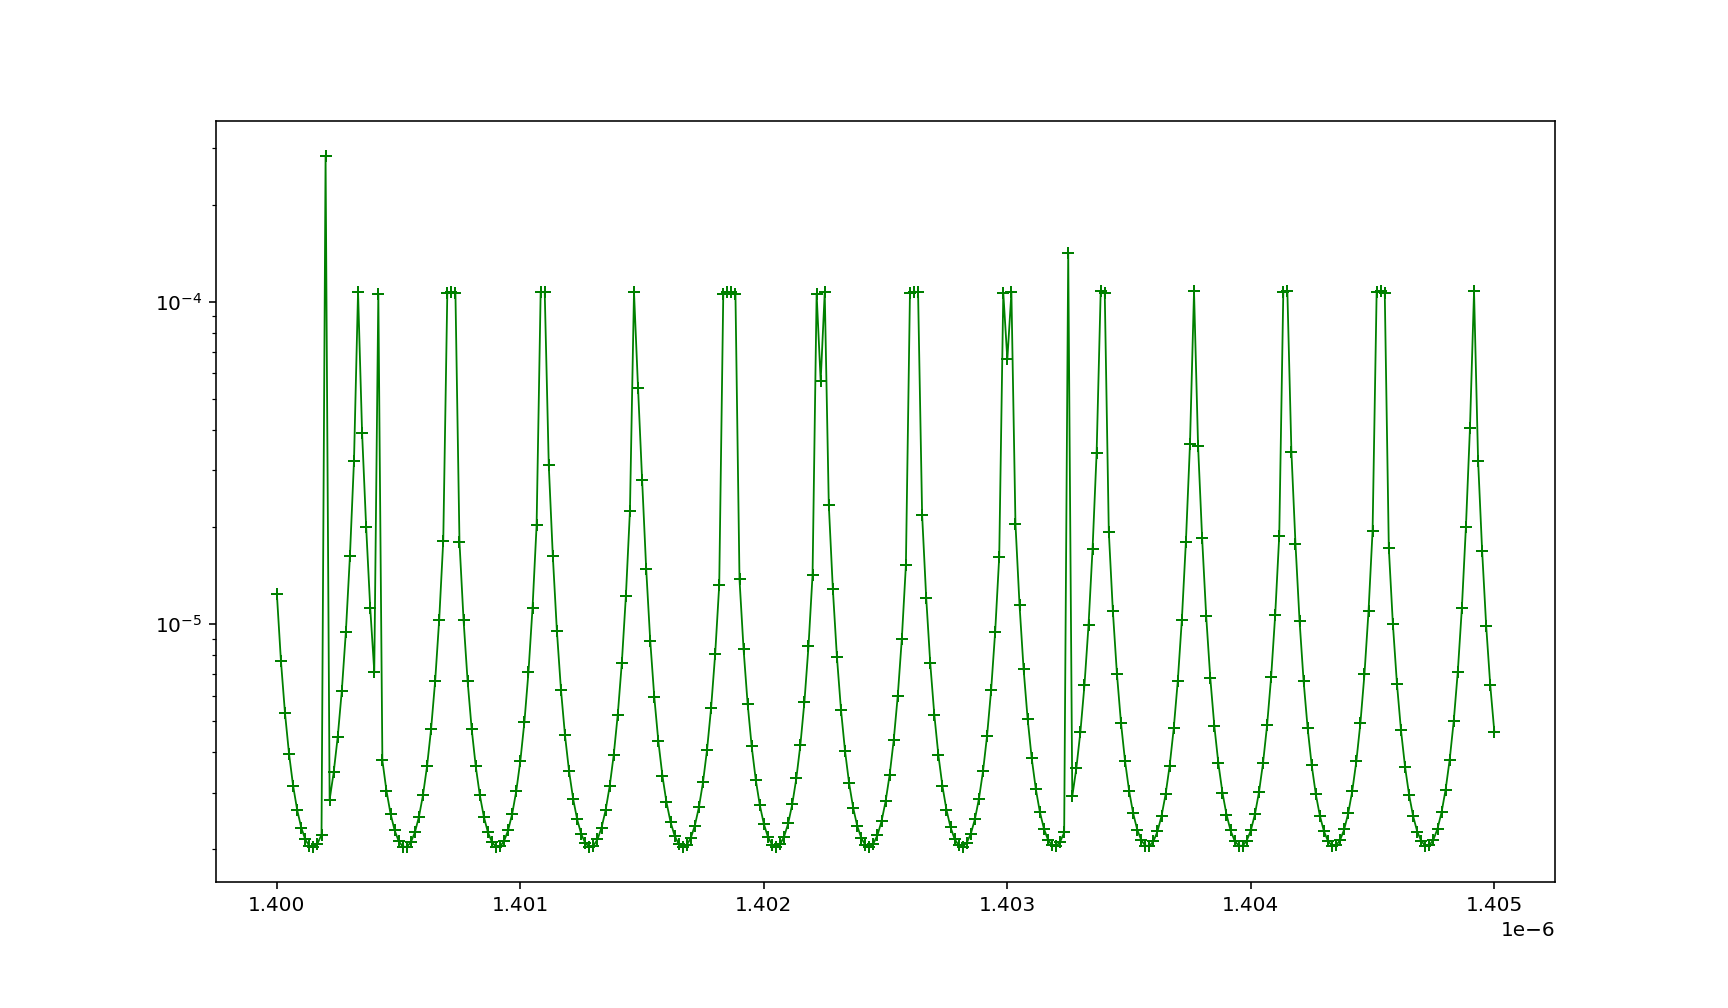

In [100]:
%matplotlib notebook
plt.figure(figsize=(12,7))
plt.plot(wls, -betas1.imag, color='green', marker='+',linewidth=.9)
plt.yscale('log')


# Light Loss Polymer

In [108]:
k = 1e-6
n_poly = 1.45 - k * 1j
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]


betas2 = np.zeros_like(wls, dtype=complex)

In [109]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl, no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.99992 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33291826346058-2.1256232632641152e-05j) . Residual of determinant:  2.3364131105706532e-12 


     --------------------  2/301: wavelength: 1.4000166666666666e-06  --------------------     

Scaled beta:  (67.33205369364569-1.3141372700353371e-05j) . Residual of determinant:  6.1748559855216e-13 


     --------------------  3/301: wavelength: 1.4000333333333333e-06  --------------------     

Scaled beta:  (67.33121119835549-9.02692011036816e-06j) . Residual of determinant:  6.305582251523652e-12 


     --------------------  4/301: wavelength: 1.4000499999999998e-06  --------------------     

Scaled beta:  (67.33038038506514-6.732055275894197e-06j) . Residual of determinant:  1.180962806009791e-11 


     --------------------  5/301: wavelength: 1.4000666666666665e-06  --------------------     

Scaled beta:  (67.3295563120397-5.360176199240484e-06j) . Residual of determinant:  5.1899

Scaled beta:  (67.30044432489863-1.7215244941931023e-05j) . Residual of determinant:  4.503620751921876e-12 


     --------------------  42/301: wavelength: 1.4006833333333333e-06  --------------------     

Scaled beta:  (67.29956132662043-3.0093549751997866e-05j) . Residual of determinant:  1.3303088028871842e-12 


     --------------------  43/301: wavelength: 1.4007e-06  --------------------     

Scaled beta:  (67.29991358630568-0.00020230581604565827j) . Residual of determinant:  1.0635435231601154e-13 


     --------------------  44/301: wavelength: 1.4007166666666667e-06  --------------------     

Scaled beta:  (67.29824415896653-0.0002030320139740958j) . Residual of determinant:  3.277732116770599e-13 


     --------------------  45/301: wavelength: 1.4007333333333334e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.29657473481977-0.00020191516611870017j) . Residual of determinant:  2.5302690067909414e-13 


     --------------------  46

scaling guess: 2
Scaled beta:  (67.26857875216916-3.939340144826668e-06j) . Residual of determinant:  1.0822727988259718e-11 


     --------------------  82/301: wavelength: 1.40135e-06  --------------------     

Captured wrong mode, retrying.
scaling guess: 1
Scaled beta:  (67.267763121856-4.456922650803648e-06j) . Residual of determinant:  1.5439057298523026e-11 


     --------------------  83/301: wavelength: 1.4013666666666666e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.26694511135133-5.27883843900127e-06j) . Residual of determinant:  1.748329644503748e-11 


     --------------------  84/301: wavelength: 1.4013833333333333e-06  --------------------     

Scaled beta:  (67.2661233133059-6.593550364437148e-06j) . Residual of determinant:  1.6054565699658902e-11 


     --------------------  85/301: wavelength: 1.4014e-06  --------------------     

Scaled beta:  (67.26529535039482-8.781453817281418e-06j) . Residual of determinant:  4.508835

scaling guess: 1
Scaled beta:  (67.23829719606603-5.594202435042876e-06j) . Residual of determinant:  1.5459857429149602e-11 


     --------------------  120/301: wavelength: 1.4019833333333334e-06  --------------------     

Scaled beta:  (67.23747875398044-4.658210876195007e-06j) . Residual of determinant:  3.265410121416952e-11 


     --------------------  121/301: wavelength: 1.402e-06  --------------------     

Scaled beta:  (67.23666314682885-4.067284390689356e-06j) . Residual of determinant:  1.1424215957435636e-12 


     --------------------  122/301: wavelength: 1.4020166666666666e-06  --------------------     

Scaled beta:  (67.23584932576657-3.703853164308804e-06j) . Residual of determinant:  1.480272208018295e-11 


     --------------------  123/301: wavelength: 1.4020333333333333e-06  --------------------     

Scaled beta:  (67.23503656927276-3.505799806676698e-06j) . Residual of determinant:  1.139311187032913e-11 


     --------------------  124/301: wavelength: 

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.2074826642532-4.848150486893386e-05j) . Residual of determinant:  7.219187719555625e-13 


     --------------------  158/301: wavelength: 1.4026166666666666e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.20732508031293-0.0002030944998067493j) . Residual of determinant:  5.4800908485552146e-14 


     --------------------  159/301: wavelength: 1.4026333333333333e-06  --------------------     

Scaled beta:  (67.20679278289404-7.467319990362783e-05j) . Residual of determinant:  1.1857065508043278e-12 


     --------------------  160/301: wavelength: 1.40265e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.20369431561674-0.00022978515316002496j) . Residual of determinant:  1.2882687657128729e-13 


     --------------------  161/301: wavelength: 1.4026666666666667e-06  --------------------     

Scaled beta:  (67.2048836846871-2.0690158421221037e-05j) . Residual of determinant:  5.

scaling guess: 1
Scaled beta:  (67.17585831122243-4.91620318764017e-06j) . Residual of determinant:  7.453117334141386e-12 


     --------------------  198/301: wavelength: 1.4032833333333335e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.17504043324527-5.999430462531828e-06j) . Residual of determinant:  2.42860640438512e-12 


     --------------------  199/301: wavelength: 1.4033e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.17421753783806-7.764572953458192e-06j) . Residual of determinant:  6.11824278052452e-12 


     --------------------  200/301: wavelength: 1.4033166666666667e-06  --------------------     

Scaled beta:  (67.17338626164772-1.0806025771460757e-05j) . Residual of determinant:  1.5643752310896367e-12 


     --------------------  201/301: wavelength: 1.4033333333333334e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.17254000254651-1.6503147125234367e-05j) . Residual of det

Scaled beta:  (67.14322547107551-3.4708765524031324e-06j) . Residual of determinant:  1.990863270277775e-11 


     --------------------  239/301: wavelength: 1.4039666666666668e-06  --------------------     

Scaled beta:  (67.14241546816898-3.468291496877903e-06j) . Residual of determinant:  2.093851626466657e-11 


     --------------------  240/301: wavelength: 1.4039833333333333e-06  --------------------     

Scaled beta:  (67.14160527687874-3.593058718309339e-06j) . Residual of determinant:  1.6459225817601085e-11 


     --------------------  241/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14079440188193-3.863662435654735e-06j) . Residual of determinant:  1.628521261111266e-11 


     --------------------  242/301: wavelength: 1.4040166666666667e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.13998224049438-4.32337946040677e-06j) . Residual of determinant:  2.995703458909803e-11 


     --------------------  243/3

Scaled beta:  (67.1122874905403-1.1135739938371687e-05j) . Residual of determinant:  1.46646546992382e-13 


     --------------------  278/301: wavelength: 1.4046166666666668e-06  --------------------     

Scaled beta:  (67.11145601582447-7.961834905442205e-06j) . Residual of determinant:  3.5040210984924158e-12 


     --------------------  279/301: wavelength: 1.4046333333333335e-06  --------------------     

Scaled beta:  (67.11063365242245-6.125211497236435e-06j) . Residual of determinant:  1.7276403573101708e-11 


     --------------------  280/301: wavelength: 1.4046500000000002e-06  --------------------     

Scaled beta:  (67.10981671587147-5.000125651759336e-06j) . Residual of determinant:  2.4566214484297483e-11 


     --------------------  281/301: wavelength: 1.4046666666666667e-06  --------------------     

Scaled beta:  (67.10900316395406-4.290409085847659e-06j) . Residual of determinant:  4.853253835738542e-12 


     --------------------  282/301: wavelength: 1.40

<IPython.core.display.Javascript object>


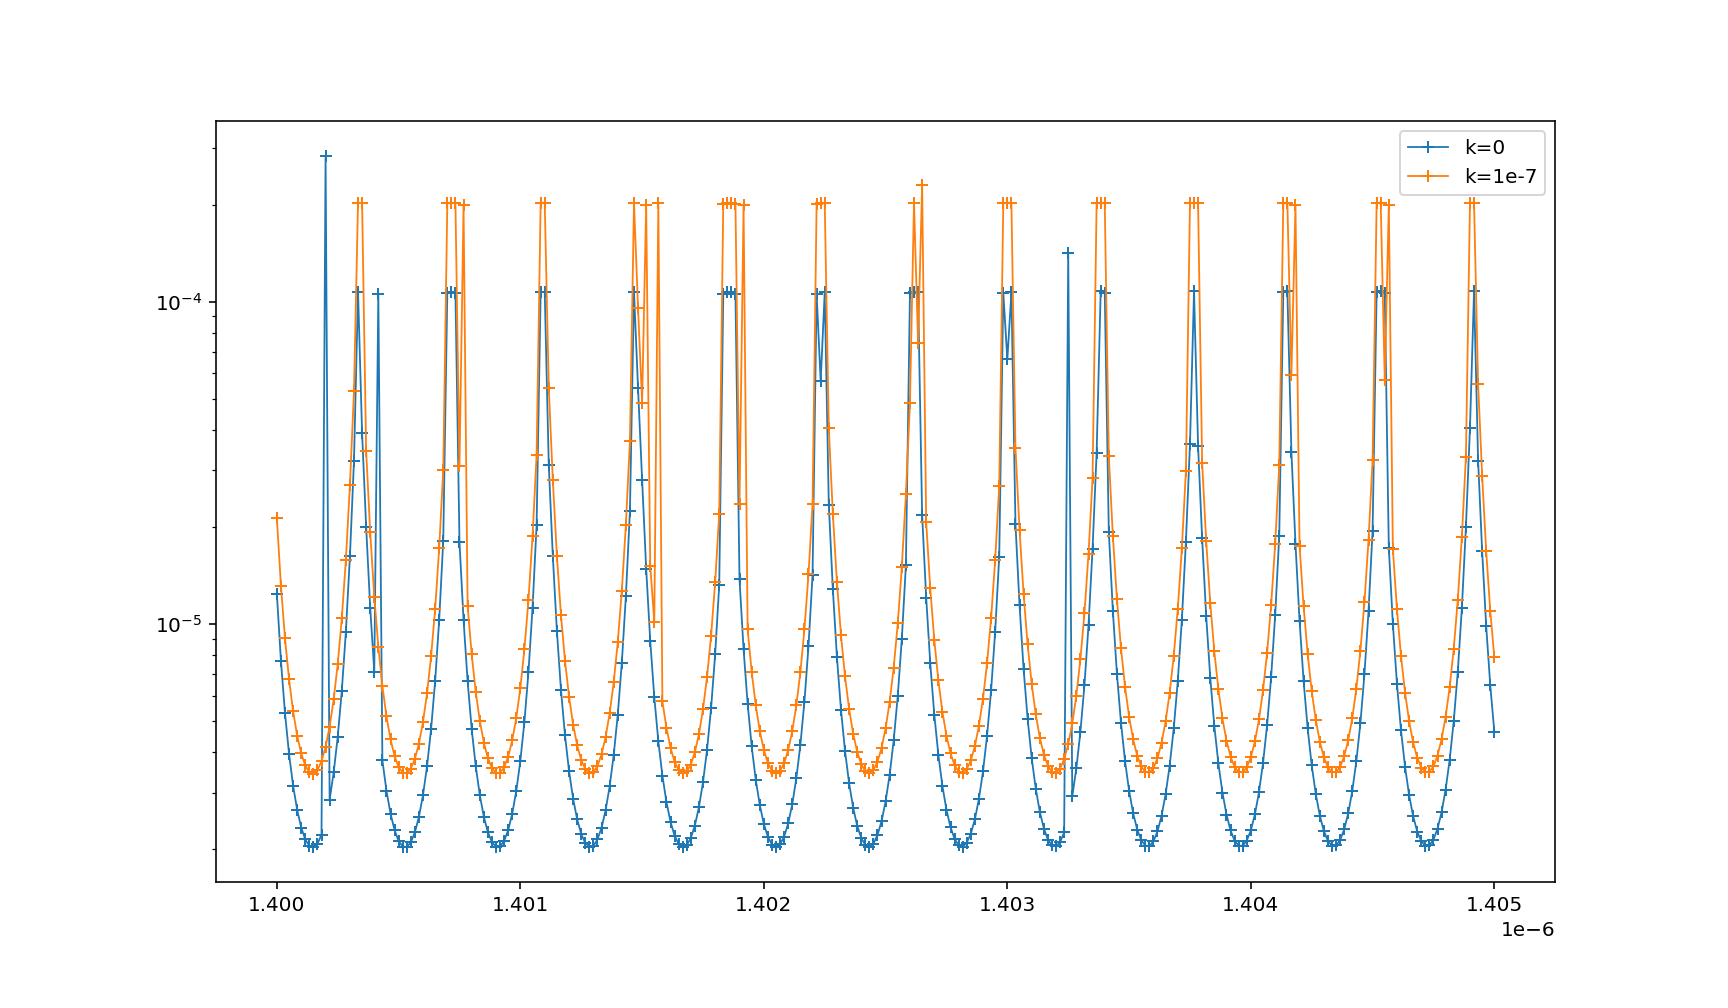

In [106]:
%matplotlib notebook
plt.figure(figsize=(12,7))
plt.plot(wls, -betas1.imag, marker='+', linewidth=.9, label='k=0')
plt.plot(wls, -betas2.imag, marker='+', linewidth=.9, label='k=1e-6')
plt.legend()
plt.yscale('log')

# Medium Loss polymer

In [128]:
k = 1e-5
n_poly = 1.45 - k * 1j
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]


betas3 = np.zeros_like(wls, dtype=complex)

In [132]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl, no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.99992 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas3[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (67.33041129674432-0.001057405497462063j) . Residual of determinant:  2.7193302945759906e-14 


     --------------------  2/301: wavelength: 1.4000166666666666e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.33203879021636-5.8127907030772235e-05j) . Residual of determinant:  2.9055898147228284e-12 


     --------------------  3/301: wavelength: 1.4000333333333333e-06  --------------------     

Scaled beta:  (67.3312030854204-4.074148466547143e-05j) . Residual of determinant:  8.511369360303042e-12 


     --------------------  4/301: wavelength: 1.4000499999999998e-06  --------------------     

Scaled beta:  (67.33037561552048-3.076719192480096e-05j) . Residual of determinant:  1.642436290985221e-11 


     --------------------  5/301: wavelength: 1.4000666666666665e-06  --------------------     

Scal

scaling guess: 1
Scaled beta:  (67.3029611856654-2.758455959526441e-05j) . Residual of determinant:  2.5581217186830388e-12 


     --------------------  39/301: wavelength: 1.4006333333333334e-06  --------------------     

Scaled beta:  (67.30213719893419-3.544041238260538e-05j) . Residual of determinant:  7.909915335149229e-12 


     --------------------  40/301: wavelength: 1.4006499999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.30130672001793-4.8693675783768046e-05j) . Residual of determinant:  2.8789478801504453e-12 


     --------------------  41/301: wavelength: 1.4006666666666666e-06  --------------------     

Scaled beta:  (67.30046586987517-7.273175888190747e-05j) . Residual of determinant:  1.9413854183610374e-12 


     --------------------  42/301: wavelength: 1.4006833333333333e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.29960802586514-0.00012084014796015727j) . Residual of determin

Scaled beta:  (67.27101918679539-1.5994352538819463e-05j) . Residual of determinant:  2.390976342080209e-12 


     --------------------  79/301: wavelength: 1.4013e-06  --------------------     

Scaled beta:  (67.27020649594405-1.610198098104308e-05j) . Residual of determinant:  6.998295680344568e-12 


     --------------------  80/301: wavelength: 1.4013166666666667e-06  --------------------     

Scaled beta:  (67.26939353679096-1.6796712963692492e-05j) . Residual of determinant:  2.7125041458812866e-11 


     --------------------  81/301: wavelength: 1.4013333333333332e-06  --------------------     

Scaled beta:  (67.26857985254546-1.8179103724058317e-05j) . Residual of determinant:  5.789320301036866e-12 


     --------------------  82/301: wavelength: 1.40135e-06  --------------------     

Scaled beta:  (67.26776488603929-2.046638858218683e-05j) . Residual of determinant:  6.857870734294159e-12 


     --------------------  83/301: wavelength: 1.4013666666666666e-06  ------

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
Scaled beta:  (67.23763564772925-0.0010557484599264804j) . Residual of determinant:  8.431826635583836e-14 


     --------------------  117/301: wavelength: 1.4019333333333333e-06  --------------------     

Scaled beta:  (67.23994147987148-4.337474957171801e-05j) . Residual of determinant:  4.786433132165091e-12 


     --------------------  118/301: wavelength: 1.40195e-06  --------------------     

Scaled beta:  (67.23911488916099-3.236359668109569e-05j) . Residual of determinant:  1.0203917821892034e-11 


     --------------------  119/301: wavelength: 1.4019666666666667e-06  --------------------     

Scaled beta:  (67.23829396438823-2.5708265152235307e-05j) . Residual of determinant:  1.7156512591694472e-11 


     --------------------  120/301: wavelength: 1.4019833333333334e-06  --------------------     

s

scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (67.21177490328265-2.6024260238762035e-05j) . Residual of determinant:  1.4436659212561716e-11 


     --------------------  153/301: wavelength: 1.4025333333333333e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.21095445022519-3.285742361695979e-05j) . Residual of determinant:  1.297081536183625e-11 


     --------------------  154/301: wavelength: 1.40255e-06  --------------------     

Scaled beta:  (67.21012830103481-4.418265391122493e-05j) . Residual of determinant:  1.0988175414546119e-11 


     --------------------  155/301: wavelength: 1.4025666666666667e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (67.20929313002215-6.421481884655121e-05j) . Residual of determinant:  2.377519125370449e-12 


     --------------------  156/301: wavelength: 1.4025833333333334e-06  ------------

Scaled beta:  (67.18235451619651-2.0520346023996304e-05j) . Residual of determinant:  2.3860974640105544e-12 


     --------------------  190/301: wavelength: 1.40315e-06  --------------------     

Scaled beta:  (67.18154155868764-1.822899718354031e-05j) . Residual of determinant:  4.288581044875348e-11 


     --------------------  191/301: wavelength: 1.4031666666666668e-06  --------------------     

Scaled beta:  (67.1807299335592-1.6841873479258335e-05j) . Residual of determinant:  1.2653544648183148e-11 


     --------------------  192/301: wavelength: 1.4031833333333335e-06  --------------------     

Scaled beta:  (67.17991908203769-1.6141662304291634e-05j) . Residual of determinant:  5.780421349095489e-12 


     --------------------  193/301: wavelength: 1.4032e-06  --------------------     

Scaled beta:  (67.17910854741669-1.602729378557289e-05j) . Residual of determinant:  7.575252951963157e-12 


     --------------------  194/301: wavelength: 1.4032166666666667e-06  -

scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
Scaled beta:  (67.13313314660668-0.0007714575245727418j) . Residual of determinant:  3.3531817182083374e-15 


     --------------------  228/301: wavelength: 1.4037833333333333e-06  --------------------     

Scaled beta:  (67.1515312203637-0.00025971839912771355j) . Residual of determinant:  1.2124134590076772e-12 


   

Scaled beta:  (67.1248936420873-1.6090480789419684e-05j) . Residual of determinant:  3.072955405437902e-11 


     --------------------  262/301: wavelength: 1.4043500000000002e-06  --------------------     

Scaled beta:  (67.1240844188306-1.6097111213891898e-05j) . Residual of determinant:  7.63578502668765e-12 


     --------------------  263/301: wavelength: 1.4043666666666666e-06  --------------------     

Scaled beta:  (67.12327500487875-1.6679116534329177e-05j) . Residual of determinant:  1.26447216507597e-11 


     --------------------  264/301: wavelength: 1.4043833333333334e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (67.12246495792053-1.791913835731727e-05j) . Residual of determinant:  1.3738549768453914e-11 


     --------------------  265/301: wavelength: 1.4044e-06  --------------------     

Scaled beta:  (67.12165374949414-2.000663038452324e-05j) . Residual of determinant:  9.495733503712918e-12 


     --------------------  266/3

Scaled beta:  (67.09479736185683-7.302265014417121e-05j) . Residual of determinant:  2.1990665567569523e-12 


     --------------------  300/301: wavelength: 1.4049833333333334e-06  --------------------     

Scaled beta:  (67.0939609601239-4.8982020781204915e-05j) . Residual of determinant:  3.7193097435747075e-12 


     --------------------  301/301: wavelength: 1.405e-06  --------------------     

Scaled beta:  (67.09313515399867-3.5699390500811095e-05j) . Residual of determinant:  1.173150315625083e-11 




<IPython.core.display.Javascript object>


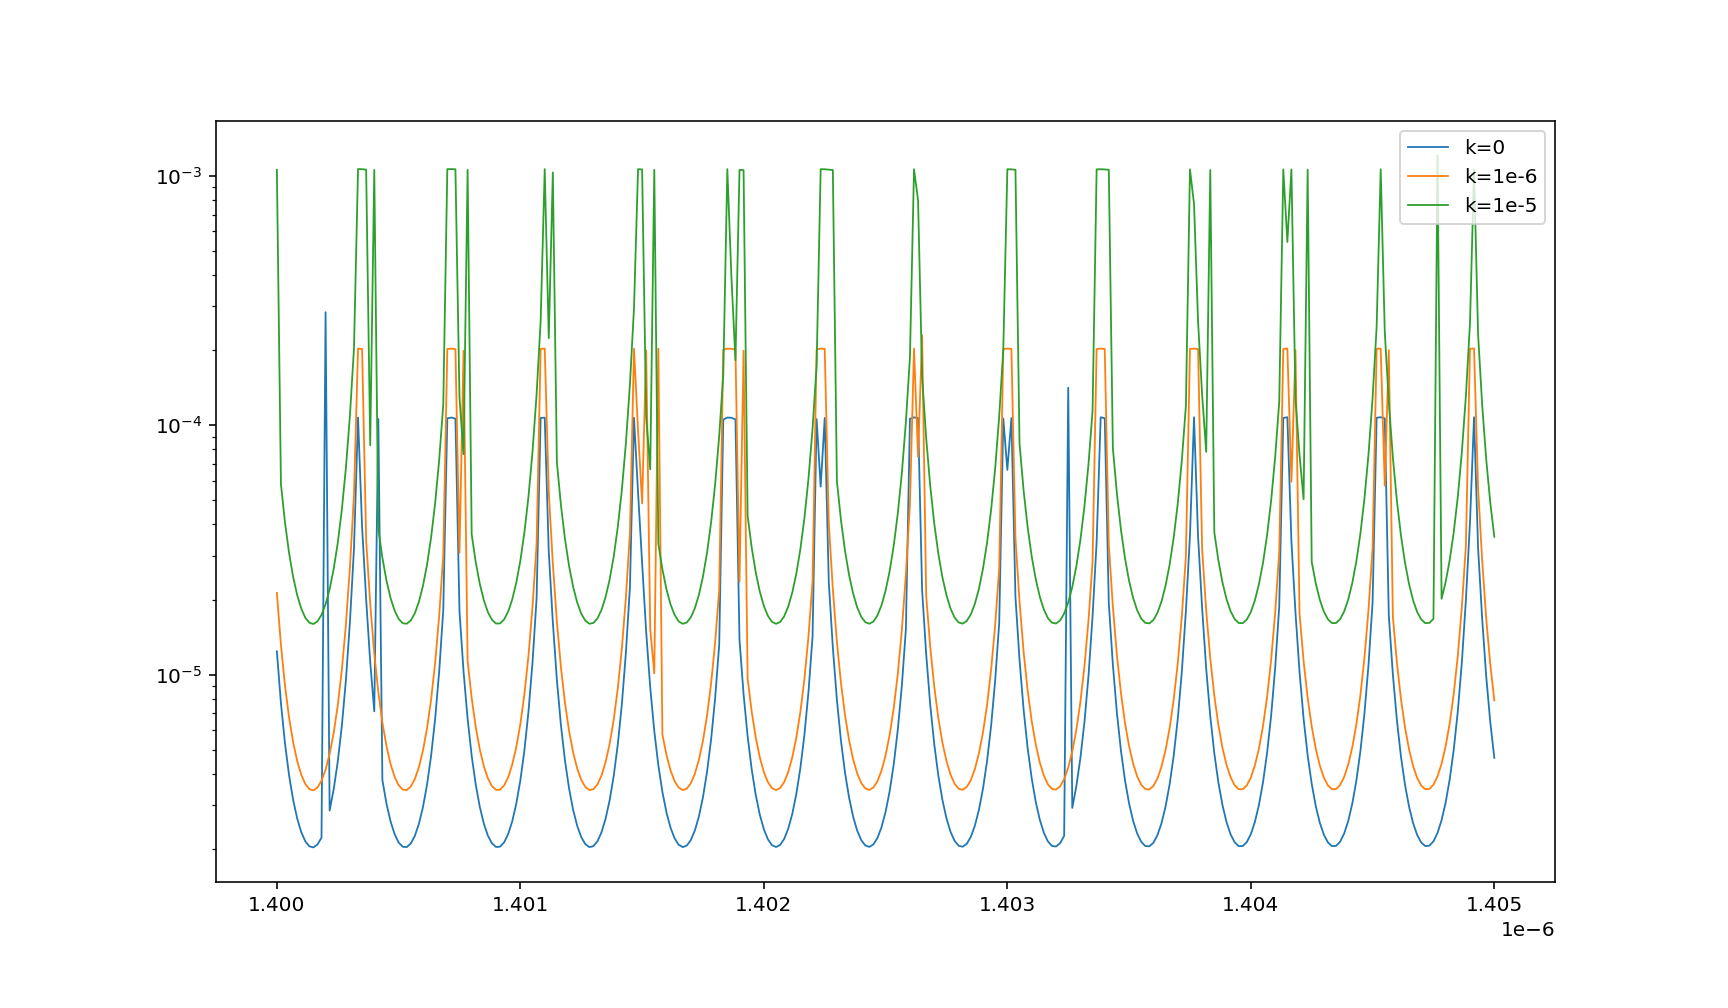

In [133]:

%matplotlib notebook
plt.figure(figsize=(12,7))
plt.plot(wls, -betas1.imag, linewidth=.9, label='k=0')
plt.plot(wls, -betas2.imag, linewidth=.9, label='k=1e-6')
plt.plot(wls, -betas3.imag, linewidth=.9, label='k=1e-5')
plt.legend()
plt.yscale('log')

# High Loss Polymer

In [161]:
k = 1e-4
n_poly = 1.45 - k * 1j
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]

betas4 = np.zeros_like(wls, dtype=complex)

In [162]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl, no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.99992 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas4[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.33269728822073-0.00010100551653067519j) . Residual of determinant:  2.5915232001738242e-11 


     --------------------  2/301: wavelength: 1.4000166666666666e-06  --------------------     

Scaled beta:  (67.33189716182817-9.891579105790062e-05j) . Residual of determinant:  1.1415320726977075e-10 


     --------------------  3/301: wavelength: 1.4000333333333333e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.3310963682083-9.651970215652226e-05j) . Residual of determinant:  3.1491352458281535e-11 


     --------------------  4/301: wavelength: 1.4000499999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.33029488418308-9.403660084882112e-05j) . Residual of determinant:  8.642648771198244e-11 


     --------------------  5/301: wavelength: 1.4000666666666665e-06  --------------------     

Scaled beta:  (67.32949275068434-9.1

Scaled beta:  (67.29983134293207-0.0001020168393096326j) . Residual of determinant:  4.907300905155586e-11 


     --------------------  43/301: wavelength: 1.4007e-06  --------------------     

Scaled beta:  (67.29903281789963-0.00010325183934275736j) . Residual of determinant:  1.2319177804566411e-10 


     --------------------  44/301: wavelength: 1.4007166666666667e-06  --------------------     

Scaled beta:  (67.29823459392372-0.00010371879257235697j) . Residual of determinant:  2.8849961822135763e-11 


     --------------------  45/301: wavelength: 1.4007333333333334e-06  --------------------     

Scaled beta:  (67.29743640648428-0.00010336027396484136j) . Residual of determinant:  7.954974908882864e-11 


     --------------------  46/301: wavelength: 1.4007499999999999e-06  --------------------     

Scaled beta:  (67.29663798807488-0.00010222084139311992j) . Residual of determinant:  2.7776128725150253e-11 


     --------------------  47/301: wavelength: 1.40076666666666

scaling guess: 2
Scaled beta:  (67.26780717610261-8.943601716994825e-05j) . Residual of determinant:  7.736972704711303e-11 


     --------------------  83/301: wavelength: 1.4013666666666666e-06  --------------------     

Scaled beta:  (67.26700585773608-9.149930269913464e-05j) . Residual of determinant:  1.742781416523269e-10 


     --------------------  84/301: wavelength: 1.4013833333333333e-06  --------------------     

Scaled beta:  (67.26620512602474-9.385245226050278e-05j) . Residual of determinant:  1.3684630381205486e-10 


     --------------------  85/301: wavelength: 1.4014e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (67.26540507108032-9.634359732778567e-05j) . Residual of determinant:  1.6714378950582434e-11 


     --------------------  86/301: wavelength: 1.4014166666666667e-06  --------------------     

Scaled beta:  (67.26460574271167-9.878282893716582e-05j) . Residual of determinant:  4.7322053391221004e-11 



Scaled beta:  (67.23742921686333-9.021689960775784e-05j) . Residual of determinant:  6.174009970568649e-11 


     --------------------  121/301: wavelength: 1.402e-06  --------------------     

Scaled beta:  (67.23662831194628-8.840455879826417e-05j) . Residual of determinant:  3.413634810505056e-11 


     --------------------  122/301: wavelength: 1.4020166666666666e-06  --------------------     

Scaled beta:  (67.23582704871244-8.704810600849802e-05j) . Residual of determinant:  1.388566749546489e-10 


     --------------------  123/301: wavelength: 1.4020333333333333e-06  --------------------     

Scaled beta:  (67.23502555145855-8.620511066337756e-05j) . Residual of determinant:  1.764306332340823e-10 


     --------------------  124/301: wavelength: 1.40205e-06  --------------------     

Scaled beta:  (67.23422394461883-8.590761931222255e-05j) . Residual of determinant:  1.7527720648603958e-10 


     --------------------  125/301: wavelength: 1.4020666666666667e-06  -----

scaling guess: 1
Scaled beta:  (67.2046664282909-0.00010140222821010594j) . Residual of determinant:  2.2210403206057249e-10 


     --------------------  162/301: wavelength: 1.4026833333333334e-06  --------------------     

Scaled beta:  (67.20386932121706-9.927421227739866e-05j) . Residual of determinant:  2.5103612885574126e-11 


     --------------------  163/301: wavelength: 1.4027e-06  --------------------     

Scaled beta:  (67.20307154094205-9.685138465472032e-05j) . Residual of determinant:  1.3328844813498008e-10 


     --------------------  164/301: wavelength: 1.4027166666666666e-06  --------------------     

Scaled beta:  (67.20227306847573-9.435248455723102e-05j) . Residual of determinant:  6.258621226053709e-11 


     --------------------  165/301: wavelength: 1.4027333333333333e-06  --------------------     

Scaled beta:  (67.20147394772769-9.197144826147521e-05j) . Residual of determinant:  2.043438567831476e-10 


     --------------------  166/301: wavelength

Scaled beta:  (67.1727208472019-0.000100450149582908j) . Residual of determinant:  3.533093517412979e-11 


     --------------------  202/301: wavelength: 1.40335e-06  --------------------     

Scaled beta:  (67.17192479805198-0.00010237185883961618j) . Residual of determinant:  5.093168874773989e-11 


     --------------------  203/301: wavelength: 1.4033666666666668e-06  --------------------     

Scaled beta:  (67.17112928887079-0.00010368757374553155j) . Residual of determinant:  5.2160524698298787e-11 


     --------------------  204/301: wavelength: 1.4033833333333333e-06  --------------------     

Scaled beta:  (67.17033410741034-0.00010424361033105872j) . Residual of determinant:  1.6007639795418392e-10 


     --------------------  205/301: wavelength: 1.4034e-06  --------------------     

Scaled beta:  (67.16953899174378-0.00010397205230984482j) . Residual of determinant:  9.790622140753486e-11 


     --------------------  206/301: wavelength: 1.4034166666666667e-06  -

Scaled beta:  (67.14082160879626-8.779857170445086e-05j) . Residual of determinant:  8.654755644549065e-11 


     --------------------  242/301: wavelength: 1.4040166666666667e-06  --------------------     

Scaled beta:  (67.14002274711729-8.9355204549267e-05j) . Residual of determinant:  5.883377909320942e-11 


     --------------------  243/301: wavelength: 1.4040333333333334e-06  --------------------     

Scaled beta:  (67.13922432987513-9.133783311761371e-05j) . Residual of determinant:  1.6359055444621369e-10 


     --------------------  244/301: wavelength: 1.4040500000000001e-06  --------------------     

Scaled beta:  (67.13842647299795-9.36439654983638e-05j) . Residual of determinant:  7.174588920152002e-11 


     --------------------  245/301: wavelength: 1.4040666666666668e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (67.13762927407637-9.613244400126927e-05j) . Residual of determinant:  1.17846986615

Scaled beta:  (67.10976033136738-9.143715038284658e-05j) . Residual of determinant:  2.2173332889577064e-12 


     --------------------  281/301: wavelength: 1.4046666666666667e-06  --------------------     

Scaled beta:  (67.10896263316111-8.945465693561692e-05j) . Residual of determinant:  3.4206051457272106e-12 


     --------------------  282/301: wavelength: 1.4046833333333334e-06  --------------------     

Scaled beta:  (67.10816452729364-8.789798924154812e-05j) . Residual of determinant:  1.2421077181311442e-10 


     --------------------  283/301: wavelength: 1.4047e-06  --------------------     

Scaled beta:  (67.10736613686097-8.683613310746935e-05j) . Residual of determinant:  2.4880769829617257e-11 


     --------------------  284/301: wavelength: 1.4047166666666668e-06  --------------------     

Scaled beta:  (67.10656758617755-8.631053145882978e-05j) . Residual of determinant:  1.7558198127231854e-11 


     --------------------  285/301: wavelength: 1.40473333333

<IPython.core.display.Javascript object>


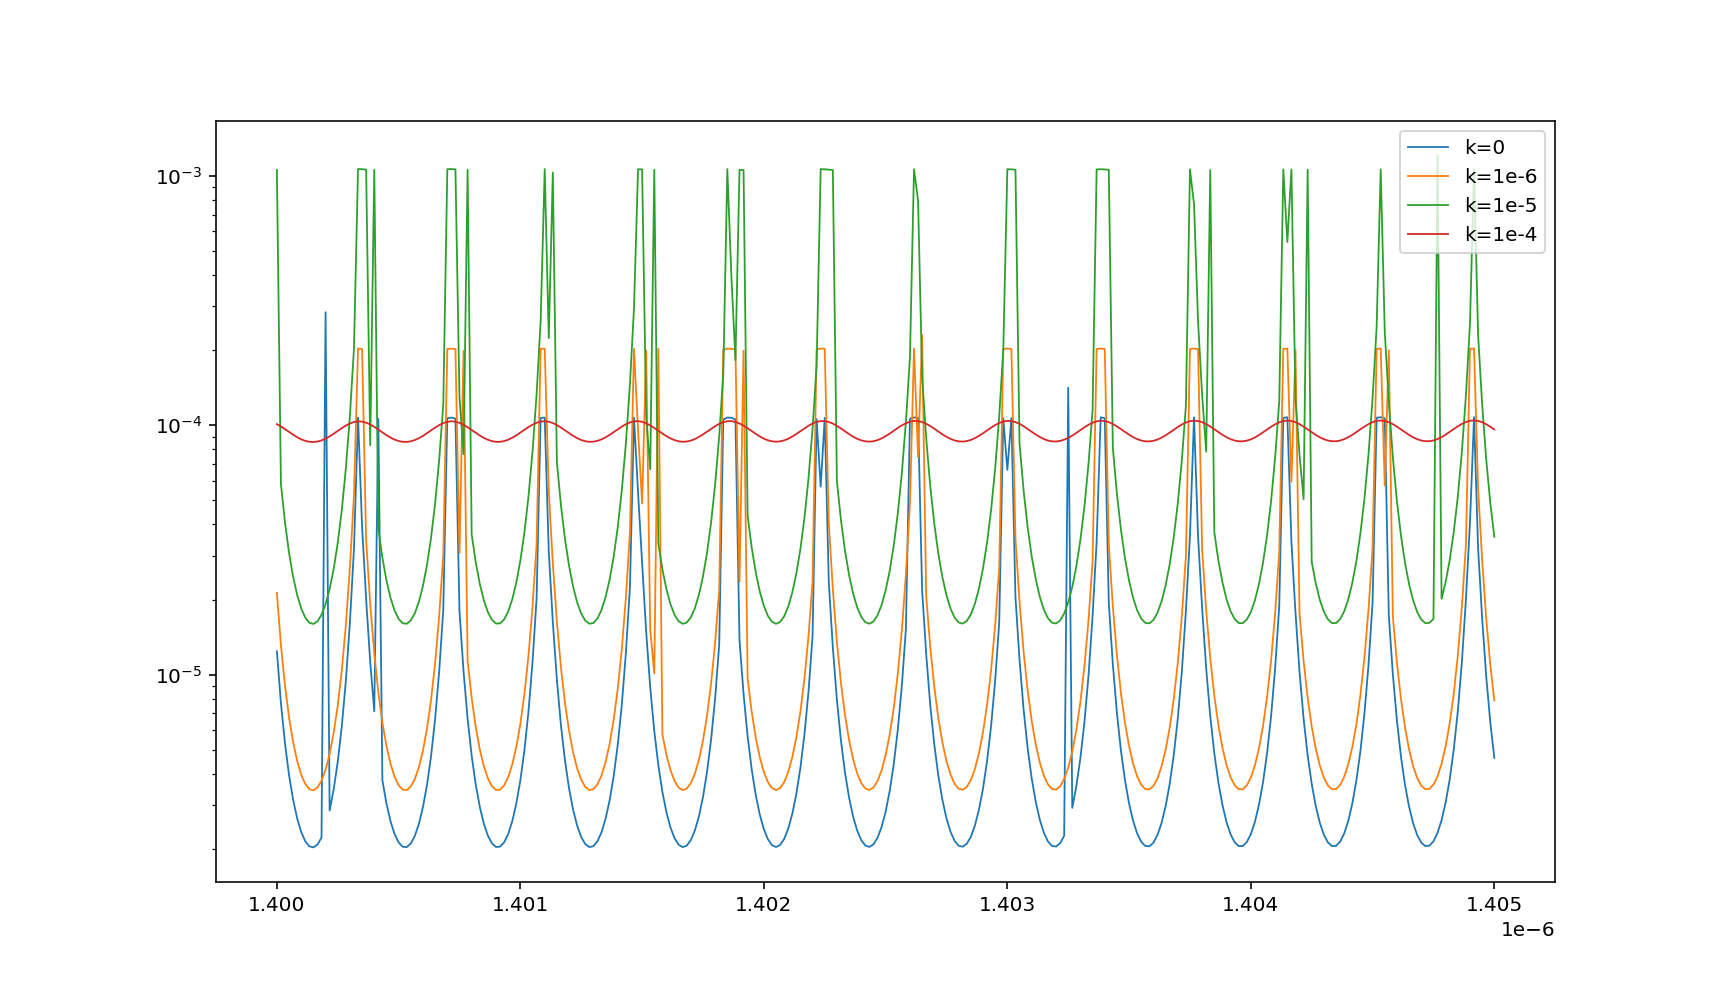

In [164]:

%matplotlib notebook
plt.figure(figsize=(12,7))
plt.plot(wls, -betas1.imag, linewidth=.9, label='k=0')
plt.plot(wls, -betas2.imag, linewidth=.9, label='k=1e-6')
plt.plot(wls, -betas3.imag, linewidth=.9, label='k=1e-5')
plt.plot(wls, -betas4.imag, linewidth=.9, label='k=1e-4')
plt.legend()
plt.yscale('log')

In [ ]:
np.save('no_loss_betas', -betas1.imag)
np.save('low_loss_betas', -betas2.imag)
np.save('med_loss_betas', -betas3.imag)
np.save('high_loss_betas', -betas4.imag)

# N0 Configuration

This is just a hole with same core radius and glass to end of domain

In [165]:
ts2 = [t0, .5*t0]
ns2 = [lambda x:n_air, lambda x:n_glass]
mats2 = ['air', 'glass']
maxhs2 = [2, .02]

In [166]:
betasN0 = np.zeros_like(wls, dtype=complex)

In [167]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    C = BraggExact(ts=ts2, ns=ns2, mats=mats2,maxhs=maxhs2, wl=wl, no_mesh=True)
    k_low = C.ks[0] * C.scale
    guess = np.array(.99992 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(C.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(C.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betasN0[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33269141518105-9.422996804515618e-05j) . Residual of determinant:  1.1992661798778261e-12 


     --------------------  2/301: wavelength: 1.4000166666666666e-06  --------------------     

Scaled beta:  (67.33188970675103-9.423221153439563e-05j) . Residual of determinant:  3.300239177834126e-13 


     --------------------  3/301: wavelength: 1.4000333333333333e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.33108801740723-9.423445505034687e-05j) . Residual of determinant:  2.3971738198454534e-13 


     --------------------  4/301: wavelength: 1.4000499999999998e-06  --------------------     

Scaled beta:  (67.33028634714894-9.423669859298238e-05j) . Residual of determinant:  2.722679433329229e-13 


     --------------------  5/301: wavelength: 1.4000666666666665e-06  --------------------     

Scaled beta:  (67.32948469597552-9.423894216235188e-05j) . Residual of 

Scaled beta:  (67.30223990668935-9.431523940899162e-05j) . Residual of determinant:  5.377552138148683e-13 


     --------------------  40/301: wavelength: 1.4006499999999999e-06  --------------------     

Scaled beta:  (67.30143892305594-9.431748391296886e-05j) . Residual of determinant:  1.7629839136632328e-13 


     --------------------  41/301: wavelength: 1.4006666666666666e-06  --------------------     

Scaled beta:  (67.3006379584828-9.431972844364499e-05j) . Residual of determinant:  6.843656353871272e-14 


     --------------------  42/301: wavelength: 1.4006833333333333e-06  --------------------     

Scaled beta:  (67.29983701296929-9.432197300102549e-05j) . Residual of determinant:  3.393498644816793e-13 


     --------------------  43/301: wavelength: 1.4007e-06  --------------------     

Scaled beta:  (67.29903608651476-9.432421758511594e-05j) . Residual of determinant:  1.884305867935153e-13 


     --------------------  44/301: wavelength: 1.4007166666666667e-06 

Scaled beta:  (67.26941519992828-9.440728596893909e-05j) . Residual of determinant:  2.821853591360234e-13 


     --------------------  81/301: wavelength: 1.4013333333333332e-06  --------------------     

Scaled beta:  (67.26861499721025-9.440953156776092e-05j) . Residual of determinant:  2.866299186155716e-13 


     --------------------  82/301: wavelength: 1.40135e-06  --------------------     

Scaled beta:  (67.26781481352467-9.441177719328552e-05j) . Residual of determinant:  4.766080076429553e-13 


     --------------------  83/301: wavelength: 1.4013666666666666e-06  --------------------     

Scaled beta:  (67.26701464887088-9.441402284553271e-05j) . Residual of determinant:  5.127190809569632e-13 


     --------------------  84/301: wavelength: 1.4013833333333333e-06  --------------------     

Scaled beta:  (67.26621450324814-9.441626852445656e-05j) . Residual of determinant:  1.2054512893549813e-13 


     --------------------  85/301: wavelength: 1.4014e-06  ---------

Scaled beta:  (67.23822139076559-9.449488411027604e-05j) . Residual of determinant:  6.295068152585211e-13 


     --------------------  120/301: wavelength: 1.4019833333333334e-06  --------------------     

Scaled beta:  (67.23742192981013-9.449713075053125e-05j) . Residual of determinant:  3.666691524483886e-14 


     --------------------  121/301: wavelength: 1.402e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.23662248786064-9.449937741750048e-05j) . Residual of determinant:  5.346168851892237e-13 


     --------------------  122/301: wavelength: 1.4020166666666666e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.23582306491649-9.450162411115899e-05j) . Residual of determinant:  2.8375122455748284e-13 


     --------------------  123/301: wavelength: 1.4020333333333333e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.23502366097695-9.450387083152676e-05j) . Residual of determinant:  4.118263069770635e-13 


     ----------

scaling guess: 1
Scaled beta:  (67.20545906927937-9.458701825772936e-05j) . Residual of determinant:  4.202362798451676e-13 


     --------------------  161/301: wavelength: 1.4026666666666667e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.20466038701396-9.458926599283016e-05j) . Residual of determinant:  5.307841725211039e-13 


     --------------------  162/301: wavelength: 1.4026833333333334e-06  --------------------     

Scaled beta:  (67.20386172372673-9.459151375462748e-05j) . Residual of determinant:  1.8082335361735043e-13 


     --------------------  163/301: wavelength: 1.4027e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.20306307941709-9.459376154314352e-05j) . Residual of determinant:  2.8674331389558965e-13 


     --------------------  164/301: wavelength: 1.4027166666666666e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.2022644540843-9.459600935835333e-05j) . Residual of determinant:  3.32371226257698e-13 


Scaled beta:  (67.17512247918027-9.467245096418274e-05j) . Residual of determinant:  5.120906161151263e-13 


     --------------------  199/301: wavelength: 1.4033e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.17432451761206-9.467469971398625e-05j) . Residual of determinant:  4.1942561468445536e-13 


     --------------------  200/301: wavelength: 1.4033166666666667e-06  --------------------     

Scaled beta:  (67.17352657499639-9.467694849052354e-05j) . Residual of determinant:  7.481744221607141e-13 


     --------------------  201/301: wavelength: 1.4033333333333334e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.17272865133258-9.46791972937688e-05j) . Residual of determinant:  1.0192420366540793e-13 


     --------------------  202/301: wavelength: 1.40335e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.17193074661996-9.468144612371525e-05j) . Residual of determinant:  2.7018181835508806e-13 


     -------------------

Scaled beta:  (67.14401601568363-9.476017199498562e-05j) . Residual of determinant:  4.3696266583048457e-13 


     --------------------  238/301: wavelength: 1.4039500000000001e-06  --------------------     

Scaled beta:  (67.14321879276442-9.476242178625338e-05j) . Residual of determinant:  1.6714096615392696e-14 


     --------------------  239/301: wavelength: 1.4039666666666668e-06  --------------------     

Scaled beta:  (67.14242158877141-9.476467160424713e-05j) . Residual of determinant:  4.49170349181634e-13 


     --------------------  240/301: wavelength: 1.4039833333333333e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.14162440370399-9.476692144890845e-05j) . Residual of determinant:  5.964299120818468e-14 


     --------------------  241/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14082723756141-9.476917132028486e-05j) . Residual of determinant:  4.86468480262336e-14 


     --------------------  242/301: wavelength: 1.

Scaled beta:  (67.11054894082451-9.485468622005017e-05j) . Residual of determinant:  3.0787983430204574e-13 


     --------------------  280/301: wavelength: 1.4046500000000002e-06  --------------------     

Scaled beta:  (67.1097525122269-9.485693713284649e-05j) . Residual of determinant:  4.223397710124692e-14 


     --------------------  281/301: wavelength: 1.4046666666666667e-06  --------------------     

scaling guess: 1
Scaled beta:  (67.10895610252729-9.485918807239152e-05j) . Residual of determinant:  3.7101106029370944e-13 


     --------------------  282/301: wavelength: 1.4046833333333334e-06  --------------------     

Scaled beta:  (67.10815971172488-9.48614390385669e-05j) . Residual of determinant:  2.7804060840127644e-13 


     --------------------  283/301: wavelength: 1.4047e-06  --------------------     

Scaled beta:  (67.1073633398191-9.486369003152537e-05j) . Residual of determinant:  2.3686267424626554e-13 


     --------------------  284/301: wavelength: 

<IPython.core.display.Javascript object>


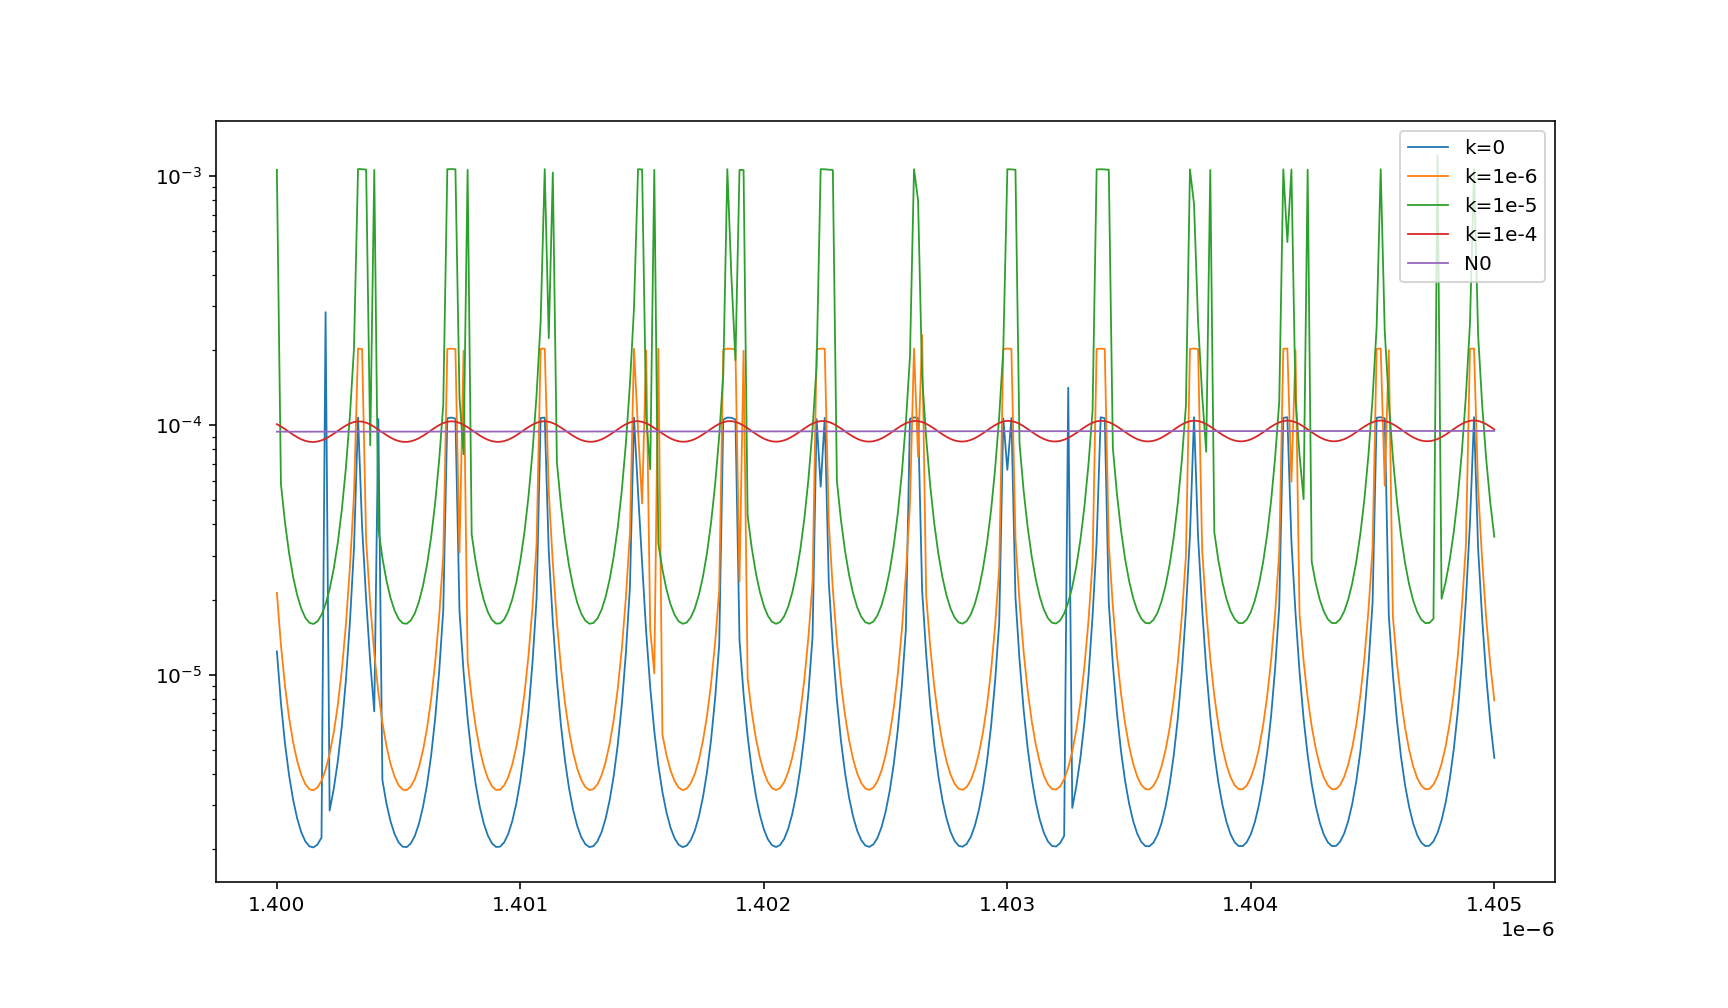

In [168]:
%matplotlib notebook
plt.figure(figsize=(12,7))
plt.plot(wls, -betas1.imag, linewidth=.9, label='k=0')
plt.plot(wls, -betas2.imag, linewidth=.9, label='k=1e-6')
plt.plot(wls, -betas3.imag, linewidth=.9, label='k=1e-5')
plt.plot(wls, -betas4.imag, linewidth=.9, label='k=1e-4')
plt.plot(wls, -betasN0.imag, linewidth=.9, label='N0')
plt.legend()
plt.yscale('log')

# Comparison Graph

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(wls, -betas1.imag, label='no loss', linewidth=.9)
plt.plot(wls, -betas2.imag, label='low loss', linewidth=.9)
plt.plot(wls, -betas3.imag, label='medium loss', linewidth=.9)
plt.plot(wls, -betas4.imag, label='high loss', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')